Pada notebook ini saya kana mencoba beberapa model standard yang biasa digunakan  dalam forecasting time series diantaranya naive model, seasonal naive model, moving average model, drift method, dan exponential smoothing.

# Modules

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import timedelta

# Data

In [2]:
df = pd.read_csv("data\weekly.csv", sep = ',' )
df

,Tanggal,LPG,Bawang Merah,Kentang,Gula Pasir,Ketela Pohon
0,03/01/2022,25833,19000,12833,13417,6000
1,10/01/2022,25833,20667,14000,13667,6000
2,17/01/2022,25833,19000,13667,13667,5667
3,24/01/2022,26000,19167,13333,15333,5667
4,31/01/2022,25833,19167,13333,15167,5667
5,07/02/2022,26000,21333,13333,14667,5333
6,14/02/2022,26000,26833,13333,14833,5333
7,21/02/2022,26000,23833,13333,15750,5333
8,28/02/2022,25565,26717,13615,15033,4826
9,07/03/2022,26000,27833,13333,15750,5333


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tanggal       26 non-null     object
 1   LPG           26 non-null     int64 
 2   Bawang Merah  26 non-null     int64 
 3   Kentang       26 non-null     int64 
 4   Gula Pasir    26 non-null     int64 
 5   Ketela Pohon  26 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [4]:
df.describe()

,LPG,Bawang Merah,Kentang,Gula Pasir,Ketela Pohon
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,25565.153846,26717.346154,13615.269231,15032.615385,4826.192308
std,329.023852,7390.592041,312.415308,597.435257,682.116120
min,25167.000000,19000.000000,12833.000000,13417.000000,4167.000000
25%,25333.000000,23416.500000,13333.000000,15033.000000,4167.000000
50%,25565.000000,25500.000000,13583.000000,15167.000000,4826.000000
75%,25833.000000,26804.000000,13917.000000,15333.000000,5333.000000
max,26000.000000,49167.000000,14109.000000,15750.000000,6000.000000


# Naive Model

In [5]:
def naive_forecast(df):
    df['Naive'] = df['Bawang Merah'].shift(1)
    return df

df = naive_forecast(df)

# Seasonal Naive Model

In [6]:
def seasonal_naive_forecast(df, season_length):
    df['Seasonal_Naive'] = df['Bawang Merah'].shift(season_length)
    return df

df = seasonal_naive_forecast(df, season_length=4)

# Moving Average Model

In [7]:
def moving_average_forecast(df, window):
    df['Moving_Avg'] = df['Bawang Merah'].rolling(window=window).mean()
    return df

df = moving_average_forecast(df, window=3)

# Drift Model

In [14]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')
df.set_index('Tanggal', inplace=True)

# Drift Method for DataFrame
def drift_forecast_df(df):
    initial_value = df['Bawang Merah'].iloc[0]
    end_value = df['Bawang Merah'].iloc[-1]
    drift = (end_value - initial_value) / (len(df) - 1)
    drift_values = initial_value + (df.index - df.index[0]).days * drift
    df['Drift'] = drift_values
    return df

# Applying the drift method to the DataFrame
df = drift_forecast_df(df)


# Exponential Smoothing

In [12]:
def exponential_smoothing_forecast(df, smoothing_level):
    model = ExponentialSmoothing(df['Bawang Merah'], trend=None, seasonal=None)
    fit = model.fit(smoothing_level=smoothing_level)
    df['Exponential_Smoothing'] = fit.fittedvalues
    return df

df = exponential_smoothing_forecast(df, smoothing_level=0.8)

# Plot Result

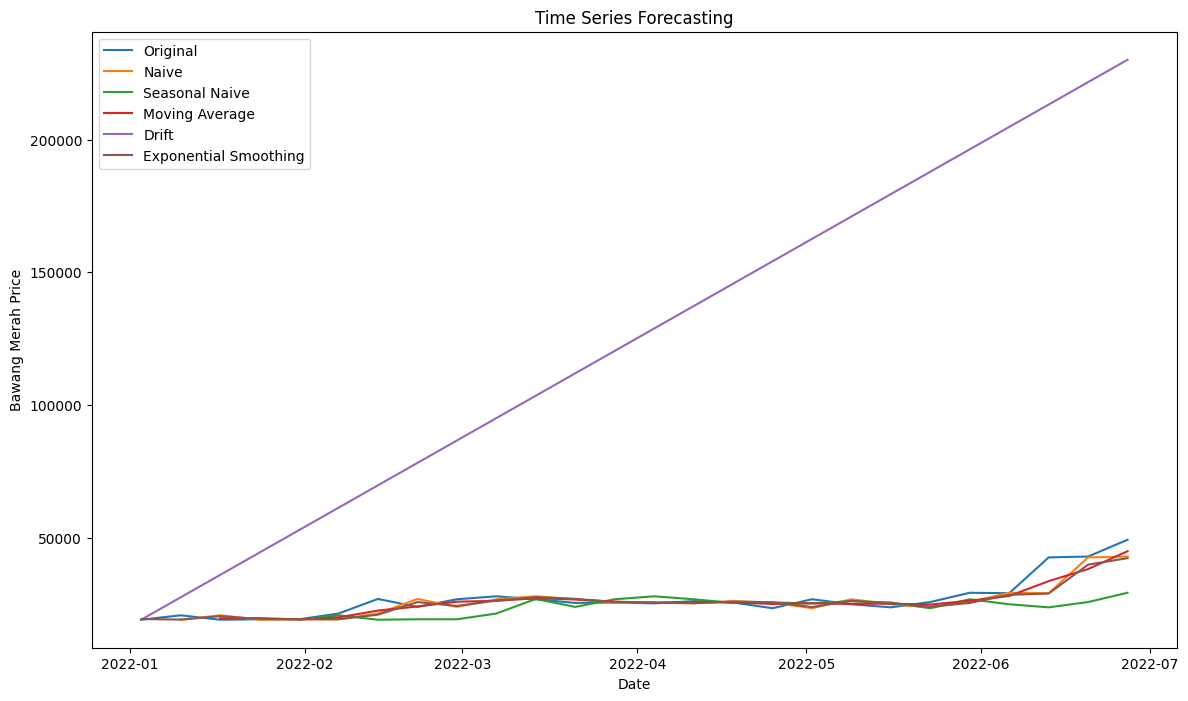

In [16]:
plt.figure(figsize=(14, 8))
plt.plot(df['Bawang Merah'], label='Original')
plt.plot(df['Naive'], label='Naive')
plt.plot(df['Seasonal_Naive'], label='Seasonal Naive')
plt.plot(df['Moving_Avg'], label='Moving Average')
plt.plot(df['Drift'], label='Drift')
plt.plot(df['Exponential_Smoothing'], label='Exponential Smoothing')
plt.legend(loc='best')
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Bawang Merah Price')
plt.show()